In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# 1)
In this problem, we will use the dataset `hw3longley`. This dataset consists of various US macroeconomic variables that are known to be highly collinear. There are a total of 7 variables:
 
* TOTEMP (column 1): Total Employment 
* GNPDEFL (column 2): GNP deflator 
* GNP (column 3) 
* UNEMP (column 4): Number of unemployed 
* ARMED (column 5): Size of armed forces 
* POP (column 6): Population 
* YEAR (column 7): Year (1947 - 1962) 
 
Load the dataset and develop a linear multiple regression model with TOTEMP as the response variable based on the remaining variables. Find the percentage error of forecasts (actual versus estimated) for all years. 

In [2]:
pd.read_csv(os.path.join(os.getcwd(), 'data', 'hw3longley.txt'), names=['initial_column'], header=None)\
    ['initial_column'].str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,,,,,,,,,60323,,...,,,,1590,,,,107608,,1947
1,,,,,,,,,61122,,...,,,,1456,,,,108632,,1948
2,,,,,,,,,60171,,...,,,,1616,,,,109773,,1949
3,,,,,,,,,61187,,...,,,,1650,,,,110929,,1950
4,,,,,,,,,63221,,...,,,,3099,,,,112075,,1951
5,,,,,,,,,63639,,...,,,,3594,,,,113270,,1952
6,,,,,,,,,64989,,...,,,,3547,,,,115094,,1953
7,,,,,,,,,63761,,...,,,3350,,,,116219,,1954,None
8,,,,,,,,,66019,,...,,,3048,,,,117388,,1955,None
9,,,,,,,,,67857,,...,,,2857,,,,118734,,1956,None


In [3]:
longley_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'hw3longley.csv'), header=None)
longley_df.columns = [
    'TOTEMP', 'GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR'
]
longley_df

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323,83.0,234289,2356,1590,107608,1947
1,61122,88.5,259426,2325,1456,108632,1948
2,60171,88.2,258054,3682,1616,109773,1949
3,61187,89.5,284599,3351,1650,110929,1950
4,63221,96.2,328975,2099,3099,112075,1951
5,63639,98.1,346999,1932,3594,113270,1952
6,64989,99.0,365385,1870,3547,115094,1953
7,63761,100.0,363112,3578,3350,116219,1954
8,66019,101.2,397469,2904,3048,117388,1955
9,67857,104.6,419180,2822,2857,118734,1956


In [4]:
regr = linear_model.LinearRegression()

X_preds = longley_df[['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR']]
response = longley_df['TOTEMP']

regr.fit(X_preds, response)

Y_predicted = regr.predict(X_preds)

In [5]:
longley_regression_df = pd.DataFrame(Y_predicted, columns=["y_pred"])
longley_regression_df["y_actual"] = longley_df['TOTEMP']
longley_regression_df["perc_error"] = (longley_regression_df["y_pred"] - longley_regression_df["y_actual"]) / longley_regression_df["y_actual"]
longley_regression_df["abs_perc_error"] = abs(longley_regression_df["perc_error"])
longley_regression_df["year"] = longley_df["YEAR"]
longley_regression_df[["year", "y_actual", "y_pred", "perc_error", "abs_perc_error"]]

,year,y_actual,y_pred,perc_error,abs_perc_error
0,1947,60323,60055.659970,-0.004432,0.004432
1,1948,61122,61216.013942,0.001538,0.001538
2,1949,60171,60124.712832,-0.000769,0.000769
3,1950,61187,61597.114622,0.006703,0.006703
4,1951,63221,62911.285409,-0.004899,0.004899
5,1952,63639,63888.311215,0.003918,0.003918
6,1953,64989,65153.048956,0.002524,0.002524
7,1954,63761,63774.180357,0.000207,0.000207
8,1955,66019,66004.695227,-0.000217,0.000217
9,1956,67857,67401.605905,-0.006711,0.006711


In [6]:
print(longley_regression_df["abs_perc_error"].mean())

0.002757331234855609


# 2) 
In this problem, we will use the dataset `hw3filip`. This dataset consists of one response variable (column 1)  and  one  independent  variable  (column  2).  First,  fit  a  linear  curve  to  this  data  (i.e.,  simple  linear regression  of  Y  based  on  X),  and  then  plot  and  compare  the  output  of  the  model  with  the  actual  data points. Next, try a polynomial of order 3 (i.e., simple nonlinear regression of 3rd order) and recheck the results. If this is still not a perfect model, increase the order and redo the exercise. When you are happy with your model, plot the error values (i.e., difference between the actual and estimated values). Discuss the results.  

In [7]:
filip_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'hw3filip.csv'), names=['response', 'predictor'])
#filip_df.head()
filip_df = filip_df.sort_values("predictor")

In [8]:
regr_problem_2 = linear_model.LinearRegression()

X = np.array(filip_df['predictor']).reshape(-1, 1)
y = np.array(filip_df['response']).reshape(-1, 1)
regr_problem_2.fit(X, y)
Y_predicted = regr_problem_2.predict(X)

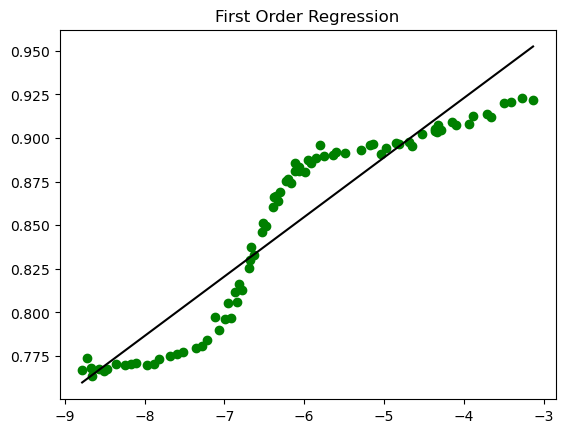

In [9]:
plt.title("First Order Regression")
plt.plot(X, Y_predicted, color='black')
plt.scatter(X, y, color='green')
plt.show()

In [10]:
def fit_poly_model(X, y, num_degrees):

    poly_reg_model = linear_model.LinearRegression()
    poly = PolynomialFeatures(degree=num_degrees, include_bias=False)
    poly_features = poly.fit_transform(X)

    poly_reg_model.fit(poly_features, y)
    y_predicted = poly_reg_model.predict(poly_features)

    return y_predicted, poly_reg_model

def plot_poly_model(X, y_predicted, y_actual, plt_title):

    plt.title(plt_title)
    plt.plot(X, y_predicted, color='black')
    plt.scatter(X, y_actual, color='green')
    plt.show()
    
    return

def plot_residuals(y_actual, y_predicted, plt_title):

    sns.residplot(x=y_actual, y=y_predicted).set(title=plt_title)
    plt.show()
    
    return

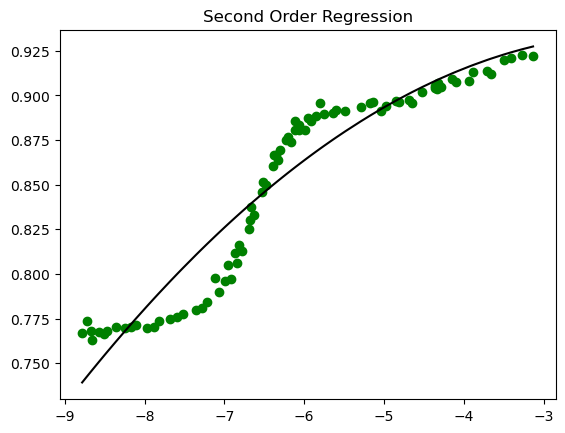

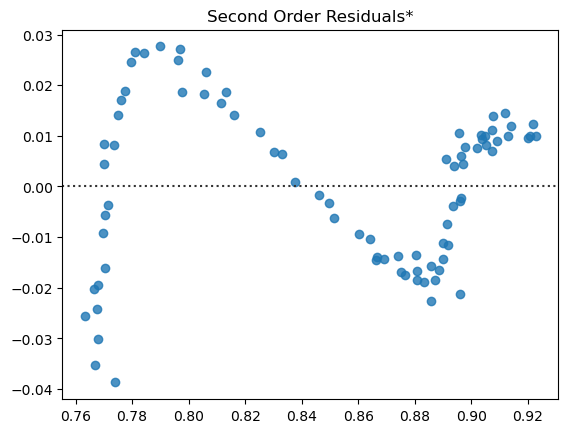

In [11]:
y_predicted_second_order, poly_model_second_order = fit_poly_model(X, y, 2)
plot_poly_model(X, y_predicted_second_order, y, "Second Order Regression")
plot_residuals(y, y_predicted_second_order, "Second Order Residuals*")

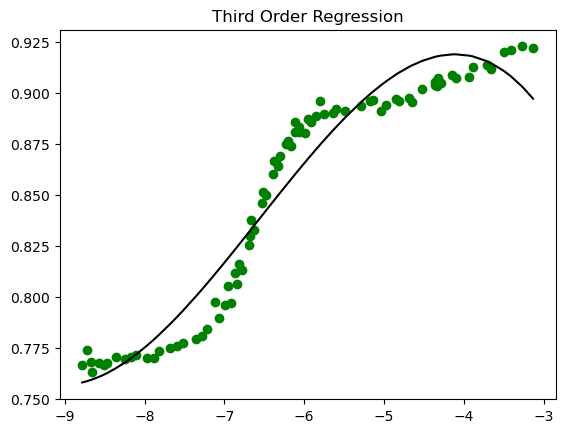

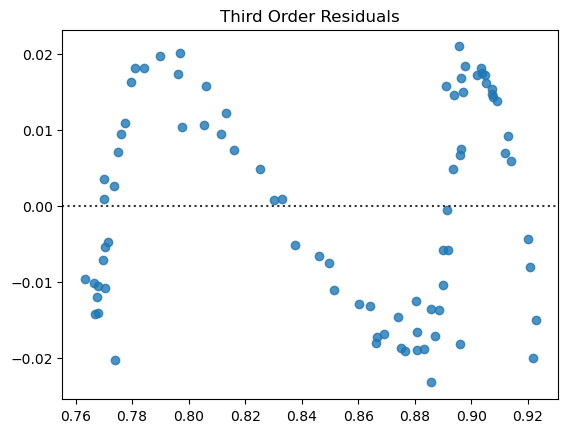

In [12]:
y_predicted_third_order, poly_model_third_order = fit_poly_model(X, y, 3)
plot_poly_model(X, y_predicted_third_order, y, "Third Order Regression")
plot_residuals(y, y_predicted_third_order, "Third Order Residuals")

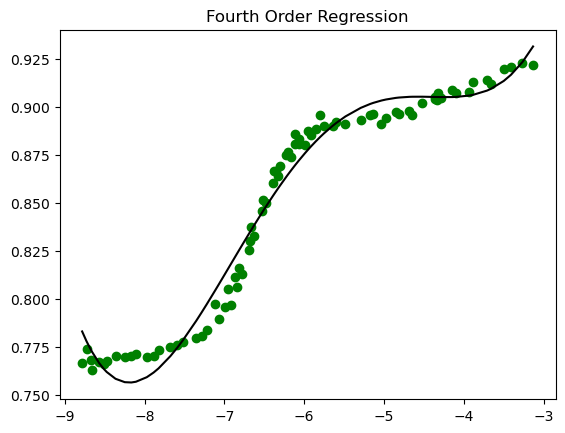

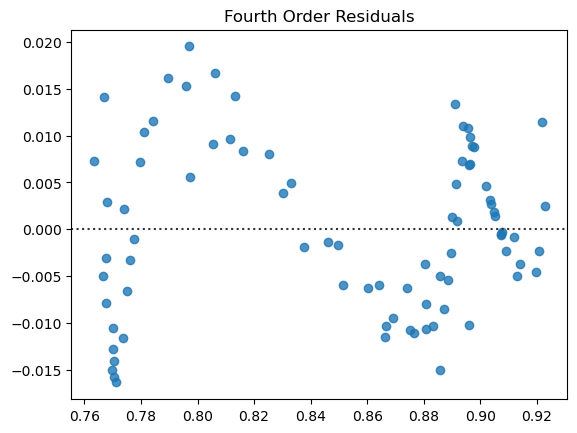

In [13]:
y_predicted_fourth_order, poly_model_fourth_order = fit_poly_model(X, y, 4)
plot_poly_model(X, y_predicted_fourth_order, y, "Fourth Order Regression")
plot_residuals(y, y_predicted_fourth_order, "Fourth Order Residuals")

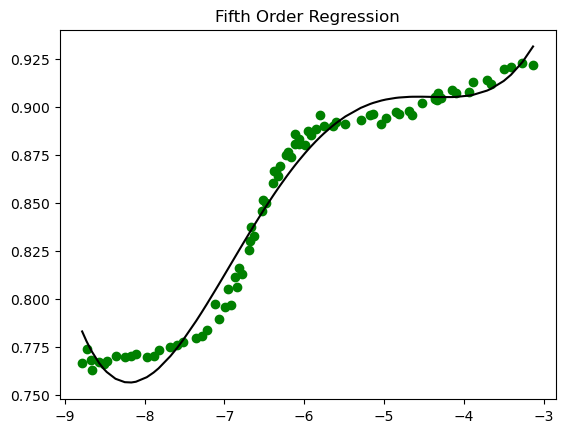

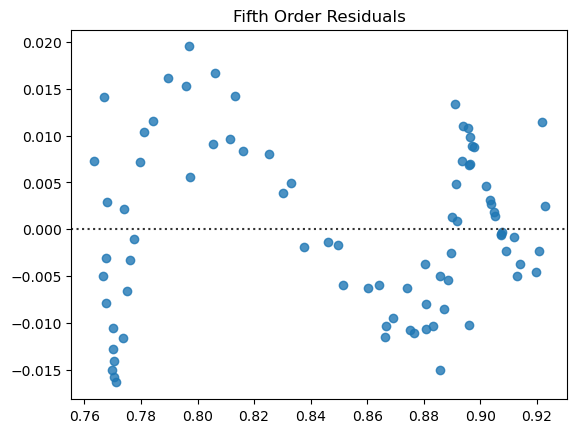

In [14]:
y_predicted_fifth_order, poly_model_fifth_order = fit_poly_model(X, y, 4)
plot_poly_model(X, y_predicted_fifth_order, y, "Fifth Order Regression")
plot_residuals(y, y_predicted_fifth_order, "Fifth Order Residuals")

In [15]:
print("coefficients: ", poly_model_fourth_order.coef_)
print("intercept:", poly_model_fourth_order.intercept_)

coefficients:  [[1.37440583 0.39709689 0.04924391 0.00217487]]
intercept: [2.64440574]


# 4)

In this problem, we will use the dataset `hw3cigarettes`. This dataset lists the tar content (in mg), nicotine content (in mg), weight (in g), and CO content (in mg) for different brands of cigarettes. Import the dataset. We will use the function `fitlm` here, which is used to fit linear regression models. One of the first things we normally do when developing regression models is to look at the correlations between different variables.  Find  and  plot  the  pairwise  correlations between the four numeric variables of tar, nicotine, weight and CO. What does that tell you? Next using the function fitlm, find a linear regression model of the response variable CO based on the other three independent variables. Discuss the results. Is a multiple linear model necessary or can we simplify it by using a simple linear regression model? What variable would you use for the latter? Compare the results. 

In [16]:
cigarette_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'hw3cigarettes.csv'))
cigarette_df

,Brand,Nicotine,Tar,Weight,CO
0,Alpine,14.1,0.86,0.9853,13.6
1,Benson&Hedges,16.0,1.06,1.0938,16.6
2,BullDurham,29.8,2.03,1.1650,23.5
3,CamelLights,8.0,0.67,0.9280,10.2
4,Carlton,4.1,0.40,0.9462,5.4
5,Chesterfield,15.0,1.04,0.8885,15.0
6,GoldenLights,8.8,0.76,1.0267,9.0
7,Kent,12.4,0.95,0.9225,12.3
8,Kool,16.6,1.12,0.9372,16.3
9,L&M,14.9,1.02,0.8858,15.4


In [17]:
corr = cigarette_df[['Nicotine', 'Tar', 'Weight', 'CO']].corr()
corr

,Nicotine,Tar,Weight,CO
Nicotine,1.000000,0.976608,0.490765,0.957485
Tar,0.976608,1.000000,0.500183,0.925947
Weight,0.490765,0.500183,1.000000,0.463959
CO,0.957485,0.925947,0.463959,1.000000


In [18]:
corr.style.background_gradient(cmap='coolwarm')

,Nicotine,Tar,Weight,CO
Nicotine,1.000000,0.976608,0.490765,0.957485
Tar,0.976608,1.000000,0.500183,0.925947
Weight,0.490765,0.500183,1.000000,0.463959
CO,0.957485,0.925947,0.463959,1.000000


In [19]:
regr_problem_4 = linear_model.LinearRegression()

problem_4_preds = cigarette_df[['Nicotine', 'Tar', 'Weight']]
problem_4_response = cigarette_df['CO']

regr_problem_4.fit(problem_4_preds, problem_4_response)

Y_predicted_problem_4 = regr_problem_4.predict(problem_4_preds)

In [20]:
co_regression_df = pd.DataFrame(Y_predicted_problem_4, columns=["y_pred_co"])
co_regression_df["y_actual_co"] = cigarette_df['CO']
co_regression_df["perc_error"] = (co_regression_df["y_pred_co"] - co_regression_df["y_actual_co"]) / co_regression_df["y_actual_co"]
co_regression_df["abs_perc_error"] = abs(co_regression_df["perc_error"])
co_regression_df.mean()

y_pred_co         12.528000
y_actual_co       12.528000
perc_error         0.063994
abs_perc_error     0.137994
dtype: float64

In [21]:
regr_problem_4.score(problem_4_preds, problem_4_response)

0.9185893479475057

In [22]:
regr_problem_4_single = linear_model.LinearRegression()

regr_problem_4_X = np.array(cigarette_df['Nicotine']).reshape(-1, 1)
regr_problem_4_Y = np.array(cigarette_df['CO']).reshape(-1, 1)
regr_problem_4_single.fit(regr_problem_4_X, regr_problem_4_Y)
Y_predicted_problem_4_single = regr_problem_4_single.predict(regr_problem_4_X)

In [23]:
co_regression_df_single = pd.DataFrame(Y_predicted_problem_4_single, columns=["y_pred_co"])
co_regression_df_single["y_actual_co"] = cigarette_df['CO']
co_regression_df_single["perc_error"] = (co_regression_df_single["y_pred_co"] - co_regression_df_single["y_actual_co"]) / co_regression_df_single["y_actual_co"]
co_regression_df_single["abs_perc_error"] = abs(co_regression_df_single["perc_error"])
co_regression_df_single.mean()


y_pred_co         12.528000
y_actual_co       12.528000
perc_error         0.061188
abs_perc_error     0.136420
dtype: float64

In [24]:
regr_problem_4_single.score(regr_problem_4_X, regr_problem_4_Y)

0.9167781566169361